# Q: Implement a simple deep neural network (DNN) for solving the polynomial equation $y = 5x^3 − 10x^2 − 20x + 10$ with the following specifications:

# Import Necessary Modules

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from sklearn.metrics import mean_squared_error

**polynomial equation** $y = 5x^3 − 10x^2 − 20x + 10$

In [33]:
def calcuate_y(x):
  return (5*(x**3) - 10*(x**2) - 20*x + 10)

# a) Use three hidden-layers of sizes 32, 64, and 128 to build the DNN model


In [34]:
def dnn_model():
  input = Input((1,), name='InputLayer')
  hidden_layer1 = Dense(32, activation='relu')(input)
  hidden_layer2 = Dense(64, activation='relu')(hidden_layer1)
  hidden_layer3 = Dense(128, activation='relu')(hidden_layer2)
  output = Dense(1, name='OutputLayer')(hidden_layer3)

  model = Model(input, output, name='DNN_Model')
  return model

# a) Display the generated DNN model with the required number of parameters

In [35]:
model = dnn_model()
model.summary()

Model: "DNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

# b) Generate training samples within the range of -20 to +20

In [36]:
def generated_samples(n):
  x = np.random.uniform(-20, 20, n)
  y = calcuate_y(x)

  return x, y

# b) Use an appropriate method for normalizing the training data in the range of -1 to +1

In [37]:
def normalize(values):
  maximum = np.max(values)
  minimum = np.min(values)

  return (2*(values - minimum)/(maximum - minimum)) - 1

# c) Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with an appropriate number of epochs.

In [38]:
# Number of Samples
n = 5000
x, y = generated_samples(n)

# Normalization
x_norm = normalize(x)
y_norm = normalize(y)

# Train
x_train, y_train = x_norm[:int(n * 0.9)], y_norm[:int(n * 0.9)]

# Validation
x_val, y_val = x_norm[int(n * 0.9) : int(n * 0.95)], y_norm[int(n * 0.9) : int(n * 0.95)]

# Test
x_test, y_test = x_norm[int(n * 0.95) : ], y_norm[int(n * 0.95) : ]

# c) Training

In [39]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mean_squared_error', metrics=[metrics.R2Score(name='accuracy')])
fitted_model = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
history = fitted_model.history

Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6820 - loss: 0.0424 - val_accuracy: 0.9911 - val_loss: 0.0013
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9943 - loss: 7.6515e-04 - val_accuracy: 0.9991 - val_loss: 1.2914e-04
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9990 - loss: 1.4105e-04 - val_accuracy: 0.9997 - val_loss: 4.6282e-05
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 4.6946e-05 - val_accuracy: 0.9995 - val_loss: 7.1501e-05
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9998 - loss: 3.6565e-05 - val_accuracy: 0.9999 - val_loss: 8.9263e-06
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 1.5979e-05 - val_accuracy: 0.9999 - val_loss: 8.9190e-06
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 1.3033e-05 - val_accuracy: 0.9999 - val_loss: 8.4031e-06
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a

# d) Display the training accuracy vs validation accuracy and training error vs validation error curves

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9999 - loss: 1.6471e-05 
Test Loss: 1.6841306205606088e-05
Test Accuracy: 0.9998845458030701
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


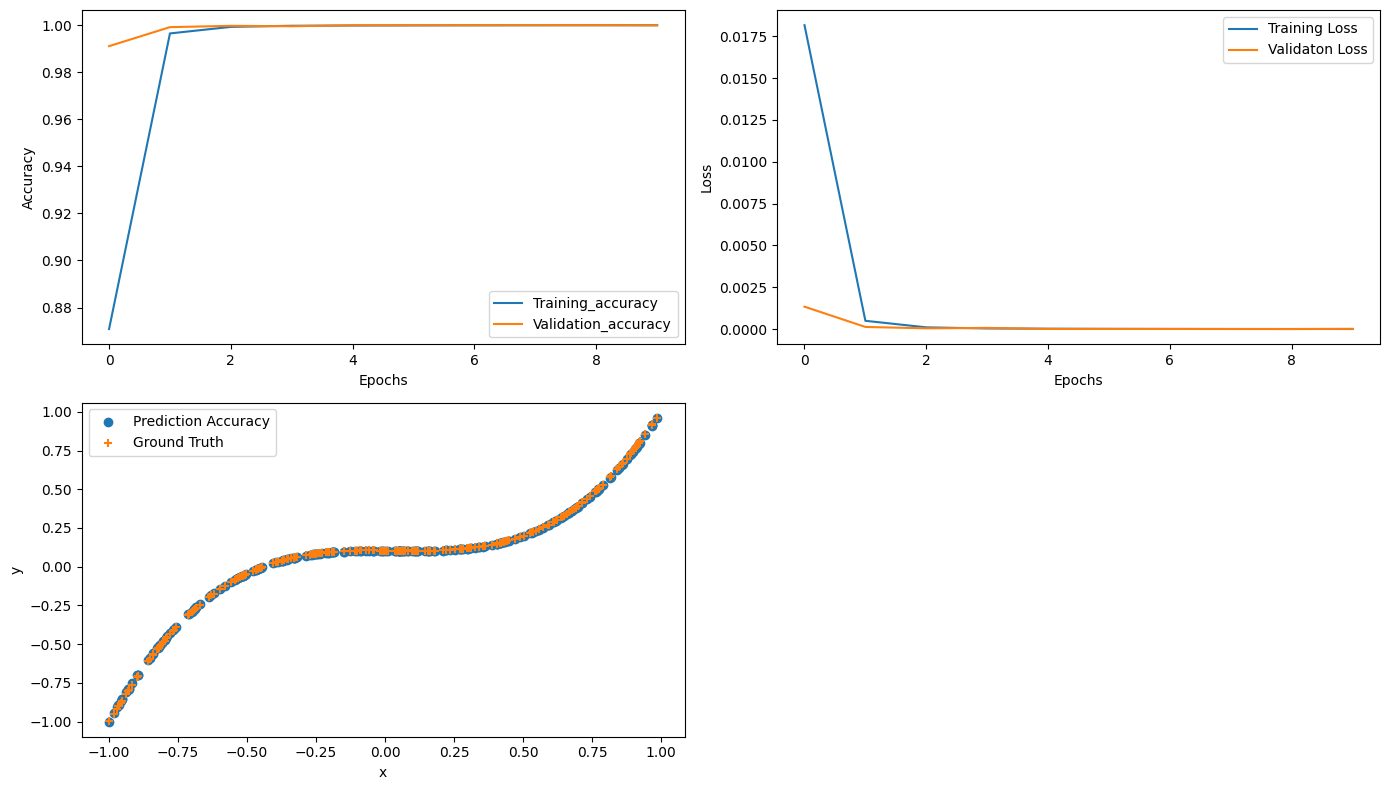

In [40]:
plt.figure(figsize=(14,8))

# Plot Training and Validation Accuracy
plt.subplot(2,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy', 'Validation_accuracy'])

# Plot Training and Validation Loss
plt.subplot(2,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validaton Loss'])

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict on test data
predictions = model.predict(x_test)

# Plot prediction accuracy vs ground truth
plt.subplot(2,2,3)
plt.scatter(x_test,y_test, marker='o')
plt.scatter(x_test, predictions, marker='+')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['Prediction Accuracy', 'Ground Truth'])

plt.tight_layout()
plt.show()